## Imports

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import adjusted_rand_score
from sklearn.manifold import TSNE
import time
import sys
# Import MainPackage
sys.path.append('../src_python')
from MainPackage import MixtureModelBernoulli

# Pre Cluster Analysis
How clusterable is this dataset?

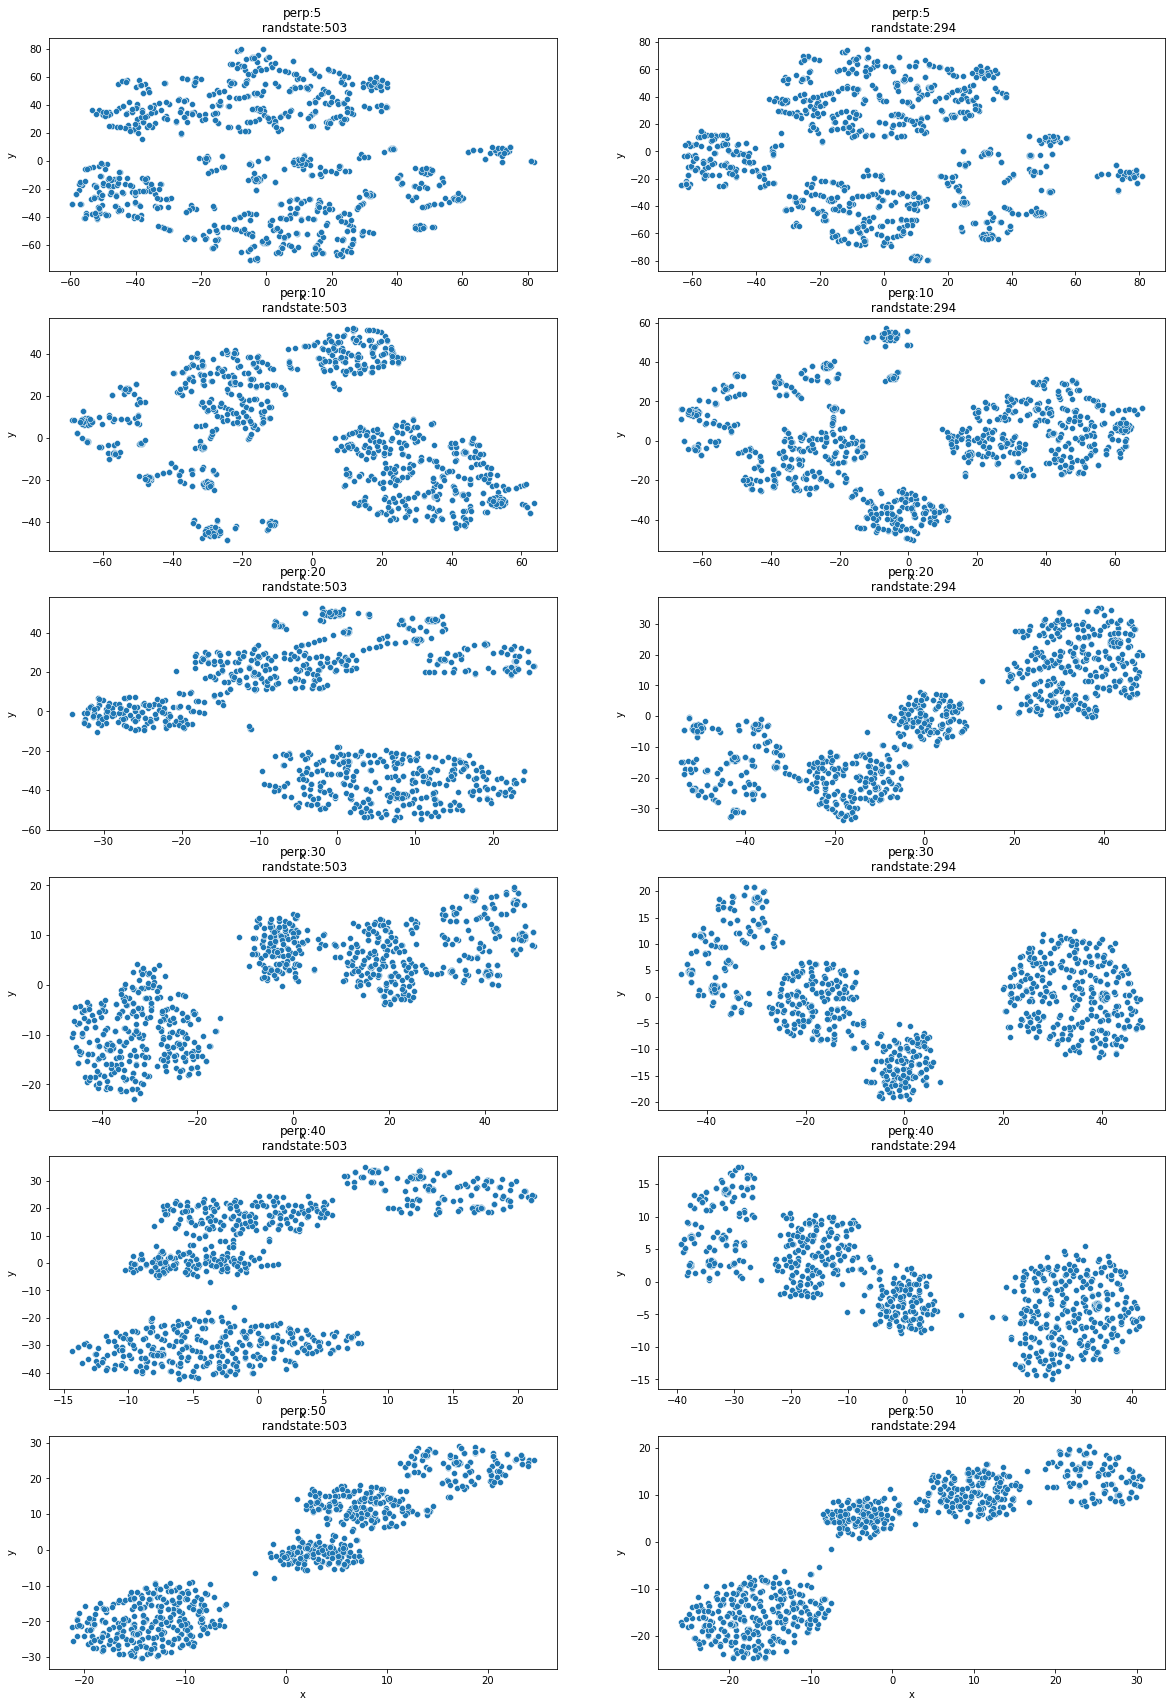

In [23]:
# Get data
df = pd.read_csv("../Data/test/test_data.csv",index_col=0)

perplexity_values = [5,10,20,30,40,50]
randState_values = [503,294]
fig, ax = plt.subplots(6,2,figsize=(20,30))
for i in range(6):
    for j in range(2):
        # Get projected data
        df_proj = TSNE(perplexity=perplexity_values[i],
                       random_state=randState_values[j],
                       metric="hamming",
                       square_distances=True).fit_transform(df)
        df_proj = pd.DataFrame(df_proj,columns=["x","y"])
        # Plot on ax
        sns.scatterplot(x="x",
                        y="y",
                        data=df_proj,
                        ax=ax[i,j])
        ax[i,j].set_title(f"perp:{perplexity_values[i]}\n randstate:{randState_values[j]}")

# Run model

In [2]:
num_classes = 4
random_state = 100

print("Data Size")
print("---------")
print(f"Samples: {df.shape[0]}")
print(f"Features: {df.shape[1]}")

# Set up model
C_list = MixtureModelBernoulli(num_classes=num_classes,
                               random_state=random_state,
                               burn_in=0,
                               max_iter=500)


# fit the data to the model
print("\nRunning...",end="")
start_time = time.time()
C_list.fit(df)
total_time = time.time() - start_time

print("DONE!")
print(f"Total time: {round(total_time,5)} (secs)")

# Get parameter estimates
k, theta, pi = C_list.get_params()

Data Size
---------
Samples: 1000
Features: 20

Running...DONE!
Total time: 37.85859 (secs)


# Print Parameters

## Pi

In [3]:
pi = pd.DataFrame(pi)
pi.columns = ["Probability"]
pi.index = [f"Cluster {x}" for x in np.arange(0,len(pi)).astype(str)]
display(pi)

,Probability
Cluster 0,0.256461
Cluster 1,0.195543
Cluster 2,0.151437
Cluster 3,0.396559


## Theta

In [4]:
theta = pd.DataFrame(theta)
theta.columns = [f"Item {x}" for x in np.arange(1,theta.shape[1]+1).astype(str)]
theta.index = [f"Cluster {x}" for x in np.arange(0,theta.shape[0]).astype(str)]
display(theta)

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,Item 11,Item 12,Item 13,Item 14,Item 15,Item 16,Item 17,Item 18,Item 19,Item 20
Cluster 0,0.040319,0.052042,0.021835,0.263456,0.265078,0.228187,0.013541,0.453761,0.283233,0.036472,0.083749,0.169774,0.008750,0.099251,0.022874,0.125656,0.038721,0.027939,0.008884,0.020097
Cluster 1,0.152635,0.196043,0.103424,0.289374,0.398627,0.845726,0.128977,0.636877,0.652367,0.144771,0.286625,0.794132,0.090498,0.836823,0.138357,0.808503,0.277406,0.257438,0.066084,0.233544
Cluster 2,0.852976,0.914744,0.897272,0.348135,0.611353,0.963386,0.440304,0.784097,0.577998,0.143286,0.238371,0.762518,0.040375,0.853803,0.418512,0.789342,0.092498,0.333984,0.053667,0.030695
Cluster 3,0.833077,0.911926,0.832860,0.867745,0.813095,0.973014,0.756585,0.938204,0.806468,0.815700,0.935485,0.957492,0.684326,0.957901,0.876972,0.925245,0.883120,0.837768,0.721969,0.874071


## K

In [5]:
k = pd.DataFrame(k)
k.columns = ["Avg Class"]
k.index = [f"Subject {x}" for x in np.arange(1,len(k)+1).astype(str)]
display(k)

,Avg Class
Subject 1,0.000000
Subject 2,0.002004
Subject 3,0.018036
Subject 4,0.931864
Subject 5,0.849699
...,...
Subject 996,0.002004
Subject 997,0.000000
Subject 998,0.014028
Subject 999,0.861723


## Class Membership

In [6]:
memebership = C_list.get_class_membership_scores()
memebership = pd.DataFrame(memebership)
memebership.columns = [f"Cluster {x}" for x in np.arange(0,memebership.shape[1]).astype(str)]
memebership.index = [f"Subject {x}" for x in np.arange(1,memebership.shape[0]+1).astype(str)]
display(memebership)

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Subject 1,0.999710,0.000290,7.491609e-09,6.407379e-17
Subject 2,0.999056,0.000944,2.859789e-08,1.368783e-14
Subject 3,0.993798,0.006200,2.224320e-06,1.676686e-13
Subject 4,0.005541,0.867118,1.273408e-01,2.203297e-08
Subject 5,0.000383,0.999396,2.206870e-04,1.226430e-09
...,...,...,...,...
Subject 996,0.999710,0.000290,7.491609e-09,6.407379e-17
Subject 997,0.998879,0.001121,5.012097e-08,1.313181e-14
Subject 998,0.988076,0.011924,4.944056e-08,6.207348e-16
Subject 999,0.000004,0.999287,7.090038e-04,9.777952e-08


# Cluster Mapping
It should be noted the cluster numbers do not align between the two clusterings. We will use the two k vectors to find the most accurate mapping between the two clusterings.

In [7]:
# Get true k vector. We subject 1 to get 0 based index
df_combined_k = pd.read_csv("../Data/test/test_k_vector.csv",index_col=0) -1
df_combined_k.columns = ["True Class"]

# round predicted k
df_combined_k["Pred Class"] = k.round().astype(np.int64).values

# Get freq table
freq_table = df_combined_k.copy()
freq_table["Ones"] = 1
freq_table = freq_table.pivot_table(columns="Pred Class",
                                    index="True Class",
                                    values="Ones",
                                    aggfunc=sum)
freq_table = freq_table.fillna(0)
freq_table

Pred Class,0,1,2,3
True Class,,,,
0,0.0,2.0,145.0,0.0
1,218.0,3.0,0.0,0.0
2,0.0,0.0,2.0,406.0
3,8.0,214.0,2.0,0.0


The table above suggests that the predicted cluster 0 corresponds to the true cluster 1. And similarly:
* 0->1
* 1->3
* 2->0
* 3->2

We will now relabel the predicted parameters so that the cluster numbers line up

In [25]:
mapping = [1,3,0,2]
mapping_inv = [2,0,3,1]
def cluster_mapping(x):
    return mapping[x]

# Map pred k
df_combined_k_mapped = df_combined_k.copy()
df_combined_k_mapped["Pred Class"] = df_combined_k["Pred Class"].apply(cluster_mapping)

# Reorder pi
df_combined_pi_mapped = pi.iloc[mapping_inv].copy()
df_combined_pi_mapped.index = [f"Cluster {x}" for x in np.arange(0,len(pi)).astype(str)]
df_combined_pi_mapped.columns = ["Pred Prob"]

# Reorder theta
df_pred_theta_mapped = theta.iloc[mapping_inv].copy()
df_pred_theta_mapped.index = [f"Cluster {x}" for x in np.arange(0,theta.shape[0]).astype(str)]

# Comparing K vectors with Adjusted Rand Score
Adjusted rand score is a score between [0,1] which compares two clusterings. 1 indicating the same clustering, and 0 indicating random cluster labels.

In [9]:
display(df_combined_k_mapped.T)
rand_score = adjusted_rand_score(df_combined_k_mapped["True Class"],
                                 df_combined_k_mapped["Pred Class"])
print(f"Adj rand score : {rand_score}")

,Subject 1,Subject 2,Subject 3,Subject 4,Subject 5,Subject 6,Subject 7,Subject 8,Subject 9,Subject 10,...,Subject 991,Subject 992,Subject 993,Subject 994,Subject 995,Subject 996,Subject 997,Subject 998,Subject 999,Subject 1000
True Class,1,1,1,3,3,0,3,2,1,2,...,1,1,2,2,3,1,1,1,3,1
Pred Class,1,1,1,3,3,0,3,2,1,2,...,1,1,2,2,3,1,1,1,3,1


Adj rand score : 0.964127326767004


With a score of .968 the clusters are almost equivalent. This gives us strong evidence the algorithm is able to accurately cluster the subjects.

# Comparing Pi Vector

In [10]:
# Get true pi vector
df_true_pi = pd.read_csv("../Data/test/test_pi_vector.csv",index_col=0)
df_true_pi.index = [f"Cluster {x}" for x in np.arange(0,len(pi)).astype(str)]
# add to combined df
df_combined_pi_mapped["True Prob"] = df_true_pi["Probability"]
display(df_combined_pi_mapped)

,Pred Prob,True Prob
Cluster 0,0.151437,0.171642
Cluster 1,0.256461,0.205224
Cluster 2,0.396559,0.419776
Cluster 3,0.195543,0.203358


# Comparing Theta Matrix

In [11]:
# Get true pi vector
df_true_theta = pd.read_csv("../Data/test/test_theta_matrix.csv",index_col=0)
df_true_theta.index = [f"Cluster {x}" for x in np.arange(0,len(pi)).astype(str)]
print("True Theta Matrix")
display(df_true_theta)
print("Pred Theta Matrix")
display(df_pred_theta_mapped)

True Theta Matrix


,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
Cluster 0,0.880435,0.934783,0.934783,0.315217,0.619565,0.989130,0.413043,0.771739,0.608696,0.130435,0.173913,0.804348,0.086957,0.847826,0.413043,0.771739,0.097826,0.369565,0.086957,0.021739
Cluster 1,0.036364,0.054545,0.009091,0.281818,0.263636,0.190909,0.000000,0.490909,0.290909,0.018182,0.045455,0.136364,0.000000,0.018182,0.027273,0.054545,0.009091,0.009091,0.000000,0.000000
Cluster 2,0.857778,0.933333,0.840000,0.897778,0.840000,0.973333,0.755556,0.951111,0.822222,0.822222,0.937778,0.955556,0.666667,0.964444,0.853333,0.942222,0.897778,0.857778,0.702222,0.862222
Cluster 3,0.064220,0.064220,0.000000,0.192661,0.348624,0.871560,0.055046,0.568807,0.678899,0.055046,0.201835,0.798165,0.000000,0.825688,0.082569,0.770642,0.183486,0.211009,0.000000,0.128440


Pred Theta Matrix


,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,Item 11,Item 12,Item 13,Item 14,Item 15,Item 16,Item 17,Item 18,Item 19,Item 20
Cluster 0,0.852976,0.914744,0.897272,0.348135,0.611353,0.963386,0.440304,0.784097,0.577998,0.143286,0.238371,0.762518,0.040375,0.853803,0.418512,0.789342,0.092498,0.333984,0.053667,0.030695
Cluster 1,0.040319,0.052042,0.021835,0.263456,0.265078,0.228187,0.013541,0.453761,0.283233,0.036472,0.083749,0.169774,0.008750,0.099251,0.022874,0.125656,0.038721,0.027939,0.008884,0.020097
Cluster 2,0.833077,0.911926,0.832860,0.867745,0.813095,0.973014,0.756585,0.938204,0.806468,0.815700,0.935485,0.957492,0.684326,0.957901,0.876972,0.925245,0.883120,0.837768,0.721969,0.874071
Cluster 3,0.152635,0.196043,0.103424,0.289374,0.398627,0.845726,0.128977,0.636877,0.652367,0.144771,0.286625,0.794132,0.090498,0.836823,0.138357,0.808503,0.277406,0.257438,0.066084,0.233544


# Analyze Convergence for thetas

(499, 4, 20)


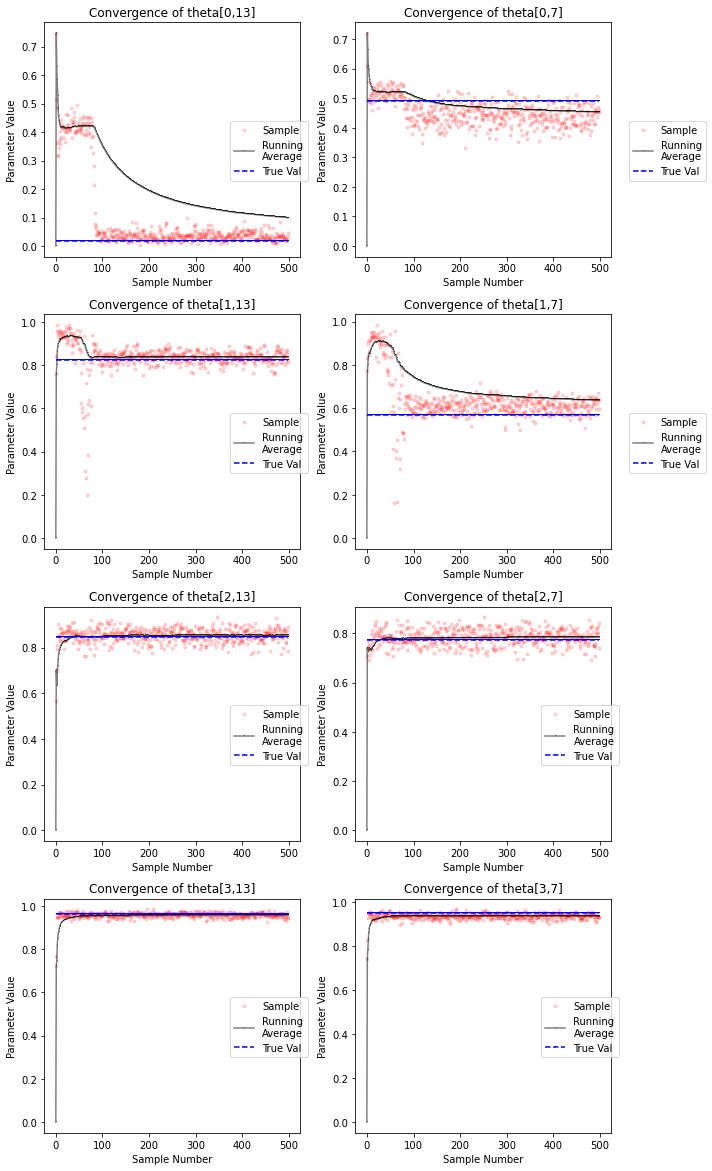

In [12]:
np.random.RandomState(100)
number_of_rows = 5
number_of_cols = 2
samples_theta_params = C_list.samples_theta_params
print(samples_theta_params.shape)

# Get random indexes
c_range = [0,1,2,3]
j_range = np.random.choice(np.arange(0,samples_theta_params.shape[2]),number_of_cols)


plt.figure(figsize=(10,20))
num_plot = 1
for c in c_range:
    for j in j_range:
        running_avg = np.zeros(samples_theta_params.shape[0])
        for num_sample in range(1,samples_theta_params.shape[0]):
            running_avg[num_sample] = np.average(samples_theta_params[:num_sample, c, j])

        plt.subplot(number_of_rows,number_of_cols,num_plot)
        # Plot samples
        plt.plot(samples_theta_params[:, c, j], ".r", label="Sample",alpha=.15)
        # Plot running avg
        plt.plot(running_avg, "-k,", label="Running\nAverage",alpha=.5)
        # plot true val
        truevals = df_true_theta.iloc[mapping[c],j] * np.ones_like(running_avg)
        plt.plot(truevals, "--b,", label="True Val")
        
        plt.xlabel("Sample Number")
        plt.ylabel("Parameter Value")
        plt.title(f"Convergence of theta[{c},{j}]")
        plt.legend(bbox_to_anchor = (1.05, 0.6))
        num_plot += 1
plt.tight_layout()

# Convergence Analysis for k

(499, 1000)


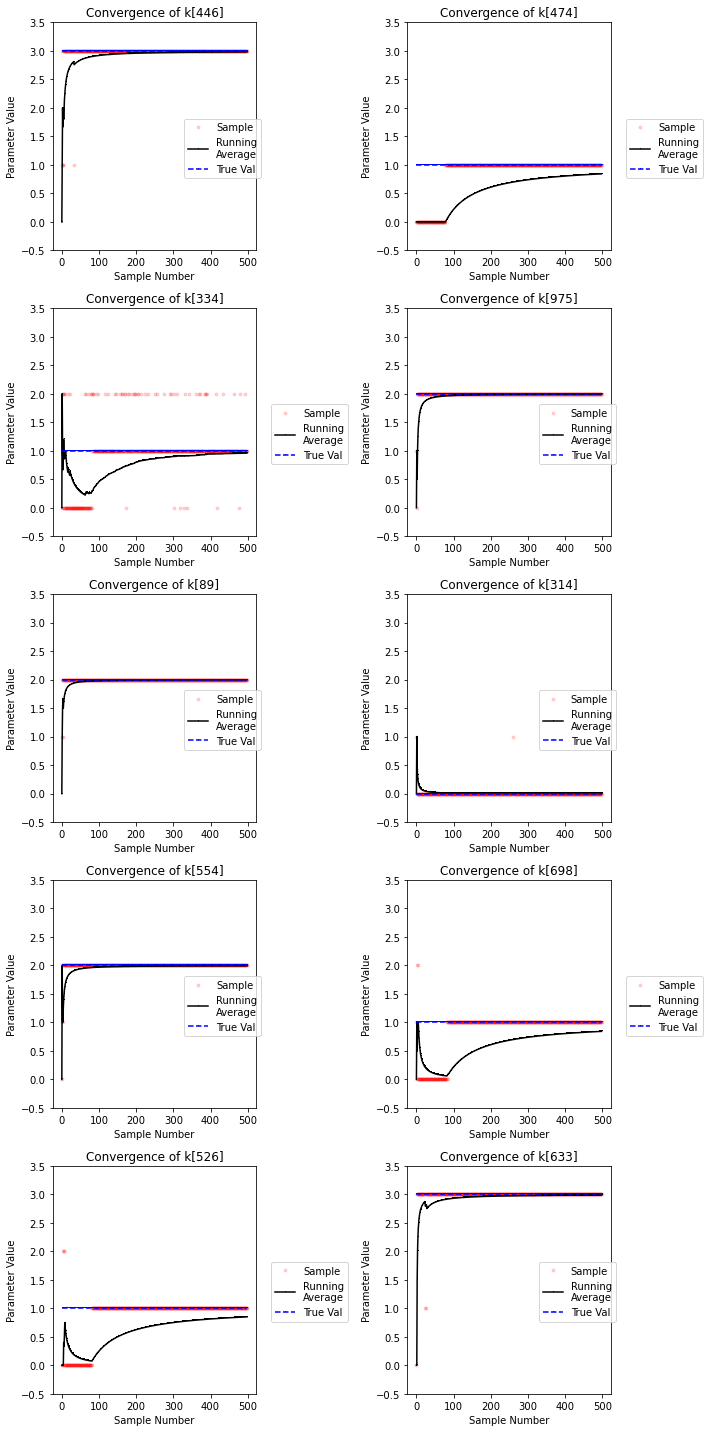

In [13]:
samples_class_assignments = C_list.samples_class_assignments
print(samples_class_assignments.shape)

# Get random indexes
i_range = np.random.choice(np.arange(0,samples_class_assignments.shape[1]),number_of_cols*number_of_rows)

plt.figure(figsize=(10,20))
num_plot = 1
for i in i_range:
    running_avg = np.zeros(samples_class_assignments.shape[0])
    for num_sample in range(1,samples_class_assignments.shape[0]):
        running_avg[num_sample] = np.average(samples_class_assignments[:num_sample, i])

    plt.subplot(number_of_rows,number_of_cols,num_plot,alpha=.5)
    # Plot samples
    plt.plot(samples_class_assignments[:, i], ".r", label="Sample",alpha=.15)
    # Plot running avg
    plt.plot(running_avg, "-k,", label="Running\nAverage")
    # plot true val
    truevals = mapping_inv[df_combined_k_mapped.iloc[i,0]] * np.ones_like(running_avg)
    plt.plot(truevals, "--b,", label="True Val")
    plt.xlabel("Sample Number")
    plt.ylabel("Parameter Value")
    plt.title(f"Convergence of k[{i}]")
    plt.legend(bbox_to_anchor = (1.05, 0.6))
    plt.ylim(-.5,3.5)
    num_plot += 1
plt.tight_layout()

# Convergence Analysis for pi

(499, 4)


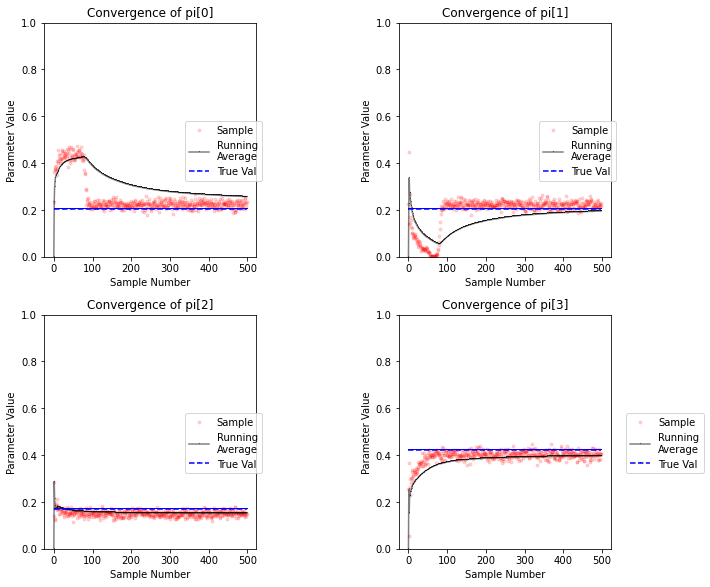

In [14]:
samples_class_probabilities = C_list.samples_class_probabilities
print(samples_class_probabilities.shape)


plt.figure(figsize=(10,20))
num_plot = 1
for c in c_range:
    running_avg = np.zeros(samples_class_probabilities.shape[0])
    for num_sample in range(1,samples_class_probabilities.shape[0]):
        running_avg[num_sample] = np.average(samples_class_probabilities[:num_sample, c])

    plt.subplot(number_of_rows,number_of_cols,num_plot)
    # Plot samples
    plt.plot(samples_class_probabilities[:, c], ".r", label="Sample",alpha=.15)
    # Plot running avg
    plt.plot(running_avg, "-k,", label="Running\nAverage",alpha=.5)
    # plot true val
    truevals = df_combined_pi_mapped.iloc[mapping[c],1] * np.ones_like(running_avg)
    plt.plot(truevals, "--b,", label="True Val")
    plt.xlabel("Sample Number")
    plt.ylabel("Parameter Value")
    plt.title(f"Convergence of pi[{c}]")
    plt.legend(bbox_to_anchor = (1.05, 0.6))
    plt.ylim(0,1)
    num_plot += 1
plt.tight_layout()

In [ ]:
# Post Cluster Analysis
# Lets view these clusters in a tsne plot

In [ ]:
# Get data
labels = k.round().astype(np.int64).values

perplexity_values = [5,10,20,30,40,50]
randState_values = [503,294]
fig, ax = plt.subplots(6,2,figsize=(20,30))
for i in range(6):
    for j in range(2):
        # Get projected data
        df_proj = TSNE(perplexity=perplexity_values[i],
                       random_state=randState_values[j],
                       metric="hamming",
                       square_distances=True).fit_transform(df)
        df_proj = pd.DataFrame(df_proj,columns=["x","y"])
        df_proj["label"] = labels
        # Plot on ax
        sns.scatterplot(x="x",
                        y="y",
                        data=df_proj,
                        hue="label",
                        ax=ax[i,j])
        ax[i,j].legend(loc='center left', bbox_to_anchor=(1, 0.5))
        ax[i,j].set_title(f"perp:{perplexity_values[i]}\n randstate:{randState_values[j]}")